In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from datetime import datetime

In [157]:
monhtly_saving_usd = 1

end_date = datetime.now().strftime('%Y-%m-%d')
start_date = '2019-01-01'

companies = ['EREGL.IS','SISE.IS','FROTO.IS','XU100.IS','USDTRY=X'] 
tickers = yf.Tickers(companies)
tickers_hist = tickers.history(period='max',start = start_date ,end=end_date,interval='1d',)



[*********************100%%**********************]  6 of 6 completed


In [158]:
df = pd.DataFrame(tickers_hist)['Close']
df_divs = pd.DataFrame(tickers_hist)['Dividends']


# Sifir atma adjustment
df['XU100.IS'] = np.where(df.index <= '20200724', df['XU100.IS']/100, df['XU100.IS'])


# Dividend calculation
for column in df:
    #df[column] = df[column] / df[column][min(df.index)]
    dividend = 0 # Hold accumulated dividends
    for idx in df[column].index:
        if df_divs[column][idx] > 0 :
            dividend = dividend + df_divs[column][idx]
        # Add dividends cumulatively    
        df[column][idx] =  df[column][idx] + dividend

# Make values relative (0-100) for easy comparison 
for column in df:
    df[column] = df[column] / df[column][min(df.index)]



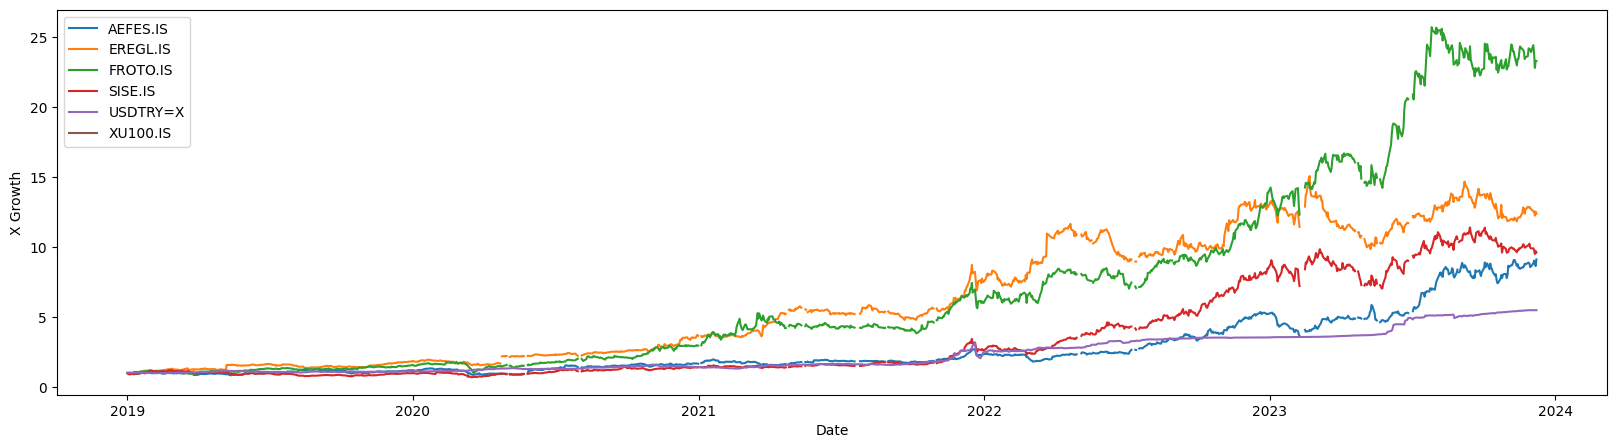

In [159]:
plt.figure(figsize=(20, 5))
plt.ylabel('X Growth')
plt.xlabel('Date')
plt.plot(df, label=df.columns)
plt.legend(loc="upper left")
plt.show()

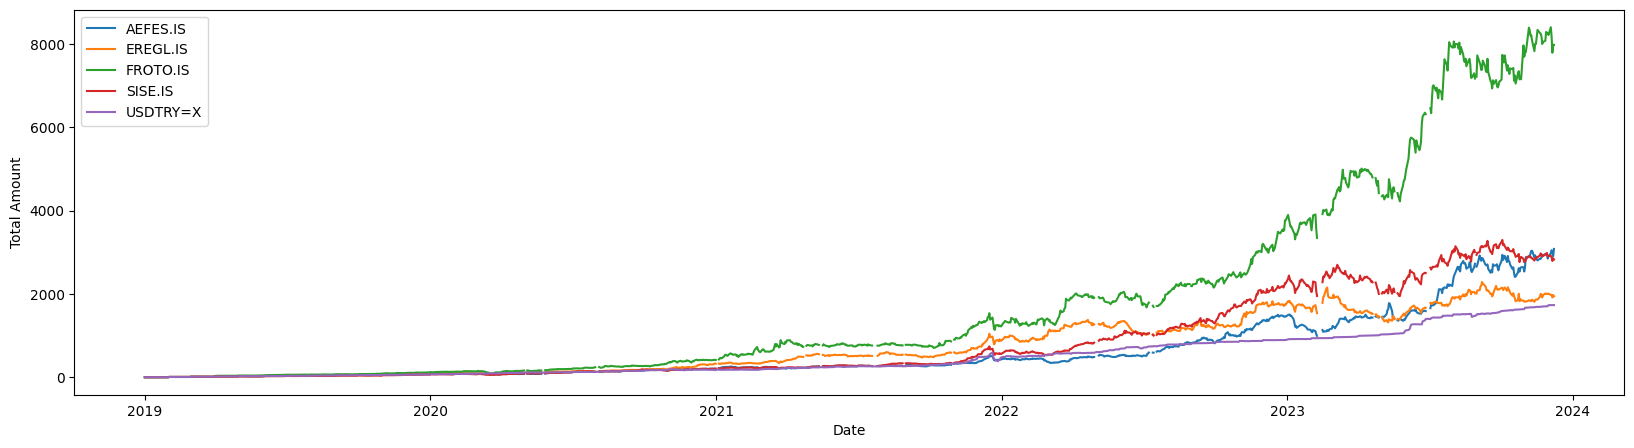

In [160]:
df2 = pd.DataFrame(tickers_hist)['Close']
df_divs2 = pd.DataFrame(tickers_hist)['Dividends']


# Sifir atma adjustment
df2['XU100.IS'] = np.where(df2.index <= '20200724', df2['XU100.IS']/100, df2['XU100.IS'])


# Dividend calculation
for column in df2:
    saved_lots = 0 
    month_of_year = 0
    for idx in df2[column].index:
        # Vacations values for TR are NaN
        if df2[column][idx] != df2[column][idx] :
            continue
        
        # Add lots for dividends if any
        if df_divs2[column][idx] > 0 :
            saved_lots = saved_lots + ( df_divs2[column][idx] / df2['USDTRY=X'][idx] )  

        
        # Add lots at start of each month
        if month_of_year != idx.strftime("%m"):
            monthly_saving_tr = monhtly_saving_usd *  df2['USDTRY=X'][idx]
            this_month_lots   = monthly_saving_tr / df2[column][idx]
            saved_lots        = saved_lots + this_month_lots 


        df2[column][idx] = saved_lots * df2[column][idx]
        
        month_of_year = idx.strftime("%m")



# df2.drop('USDTRY=X', axis=1,inplace=True)
df2.drop('XU100.IS', axis=1,inplace=True)


plt.figure(figsize=(20, 5))
plt.ylabel('Total Amount')
plt.xlabel('Date')
plt.plot(df2, label=df2.columns)
plt.legend(loc="upper left")
plt.show()